# **Customer Segmentation Using Clustering**

---



# **1. Environment Setup and Data Loading**
First, we need to import necessary libraries and load the dataset.


In [2]:
# Import required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
from google.colab import files

# Set style for plots
sns.set(style="whitegrid")

In [3]:
# Upload dataset in Colab
uploaded = files.upload()

Saving Mall_Customers.csv to Mall_Customers.csv


In [4]:
# Load dataset
df = pd.read_csv('Mall_Customers.csv')
print("Dataset loaded successfully!")

Dataset loaded successfully!


# **2. Exploratory Data Analysis (EDA)**
 Understanding the data structure and distributions to get some meaningful insights.

In [5]:
# Display basic dataset information
print("\nDataset Overview:")
print(f"Shape: {df.shape}")
print("\nFirst 5 rows:")
print(df.head())
print("\nData Summary:")
print(df.info())
print("\nDescriptive Statistics:")
print(df.describe())


Dataset Overview:
Shape: (200, 5)

First 5 rows:
   CustomerID   Genre  Age  Annual Income (k$)  Spending Score (1-100)
0           1    Male   19                  15                      39
1           2    Male   21                  15                      81
2           3  Female   20                  16                       6
3           4  Female   23                  16                      77
4           5  Female   31                  17                      40

Data Summary:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Genre                   200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage:

In [6]:
# Check for missing values
print("\nMissing Values Check:")
print(df.isnull().sum())


Missing Values Check:
CustomerID                0
Genre                     0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64


In [7]:
# Visualize distributions
plt.figure(figsize=(20, 12))

<Figure size 2000x1200 with 0 Axes>

<Figure size 2000x1200 with 0 Axes>

Text(0.5, 1.0, 'Age Distribution')

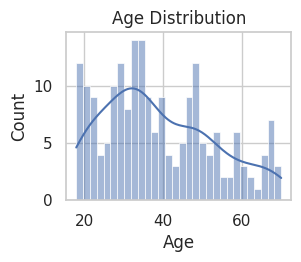

In [8]:
# Age distribution
plt.subplot(2, 2, 1)
sns.histplot(df['Age'], kde=True, bins=30)
plt.title('Age Distribution')

# **Observation:**
- ***Looking at the age distribution, most customers seem to be younger adults, especially around their early 30s. There's a good mix, though, stretching up to older ages.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

Text(0.5, 1.0, 'Annual Income Distribution')

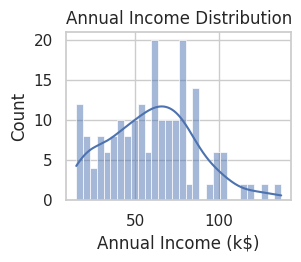

In [9]:
# Annual Income distribution
plt.subplot(2, 2, 2)
sns.histplot(df['Annual Income (k$)'], kde=True, bins=30)
plt.title('Annual Income Distribution')

# **Observation:**
- ***Customer incomes vary quite a bit. Many seem to fall into the middle range, but there are definitely groups with lower and higher incomes too.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

Text(0.5, 1.0, 'Spending Score Distribution')

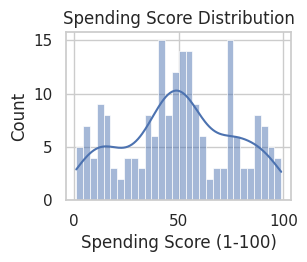

In [10]:
# Spending Score distribution
plt.subplot(2, 2, 3)
sns.histplot(df['Spending Score (1-100)'], kde=True, bins=30)
plt.title('Spending Score Distribution')

# **Observation:**
- ***The spending scores are quite spread out, centering around the 50 mark. This suggests we have a mix of cautious and eager spenders.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

Text(0.5, 1.0, 'Gender Distribution')

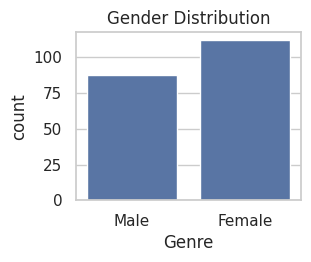

In [14]:
# Gender distribution
plt.subplot(2, 2, 4)
sns.countplot(x='Genre', data=df)
plt.title('Gender Distribution')

# **Observation:**
- ***Looking at the gender split, we see a slightly higher count of female customers in our dataset.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

In [15]:
plt.tight_layout()
plt.show()

<Figure size 640x480 with 0 Axes>

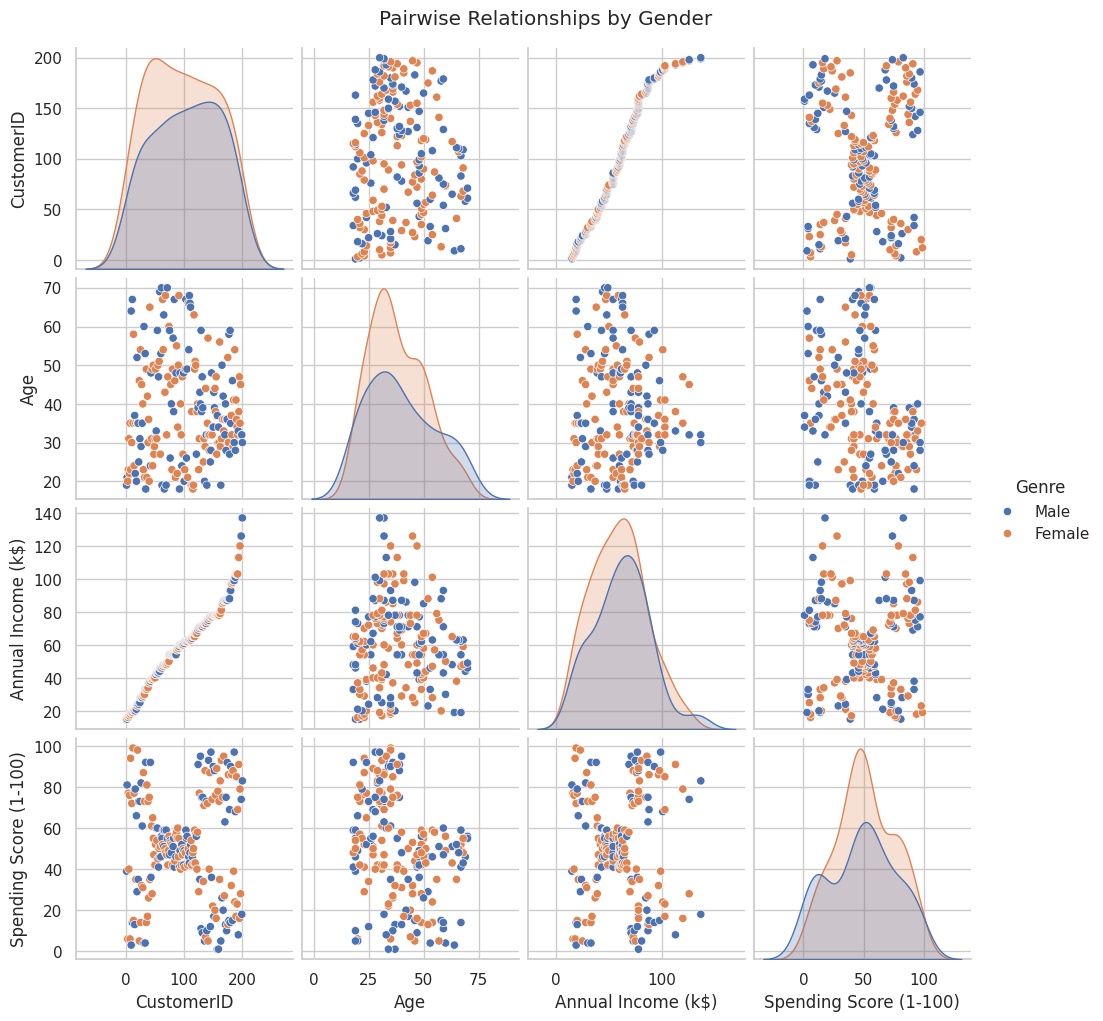

In [17]:
# Pairplot for relationships
sns.pairplot(df, hue='Genre', diag_kind='kde')
plt.suptitle('Pairwise Relationships by Gender', y=1.02)
plt.show()

# **Observation:**
- ***This pairplot helps visualize relationships. The 'Annual Income vs. Spending Score' plot stands out, suggesting potential natural groupings. Other relationships, like 'Age vs. Spending Score', also show some patterns worth noting. Differences between genders are not clearly appeare in the scatter plots.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **3. Data Preprocessing**
Preparing data for clustering algorithm.

In [19]:
# Convert categorical variable (Gender) to numerical
df['Genre'] = df['Genre'].map({'Male': 0, 'Female': 1})

In [21]:
# Select relevant features
X = df[['Genre', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']]

In [22]:
# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [23]:
print("\nScaled Features Sample:")
print(X_scaled[:5])


Scaled Features Sample:
[[-1.12815215 -1.42456879 -1.73899919 -0.43480148]
 [-1.12815215 -1.28103541 -1.73899919  1.19570407]
 [ 0.88640526 -1.3528021  -1.70082976 -1.71591298]
 [ 0.88640526 -1.13750203 -1.70082976  1.04041783]
 [ 0.88640526 -0.56336851 -1.66266033 -0.39597992]]


# **4. Determining Optimal Clusters**
Using the Elbow Method and Silhouette Score

***Calculate Within-Cluster Sum of Squares (WCSS) for different k values***

In [24]:
wcss = []
silhouette_scores = []
max_clusters = 10

for k in range(2, max_clusters+1):
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(X_scaled)
    wcss.append(kmeans.inertia_)

    # Silhouette Score calculation
    silhouette_avg = silhouette_score(X_scaled, kmeans.labels_)
    silhouette_scores.append(silhouette_avg)

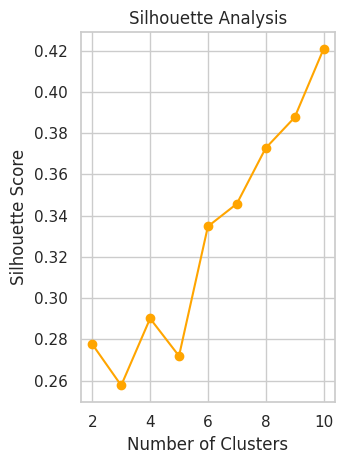

In [26]:
# Plot Silhouette Scores
plt.subplot(1, 2, 2)
plt.plot(range(2, max_clusters+1), silhouette_scores, marker='o', color='orange')
plt.xlabel('Number of Clusters')
plt.ylabel('Silhouette Score')
plt.title('Silhouette Analysis')

plt.tight_layout()
plt.show()

# **Observation:**
- ***The Elbow method helps narrow down potential cluster counts, often showing a bend where adding more clusters gives diminishing returns. The Silhouette plot gives us another perspective, measuring how well-separated the clusters are. I'll use these to pick a suitable number of clusters for our model.***

**--------------------------------------------------------------------------------------------------------------------------------------------------------------**

# **5. Applying K-Means Clustering**
Based on the analysis above, we will choose optimal k=5.

In [27]:
# Apply K-Means with optimal clusters
optimal_k = 5
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
clusters = kmeans.fit_predict(X_scaled)

# Add cluster labels to original dataframe
df['Cluster'] = clusters

print("Clustering complete! Cluster distribution:")
print(df['Cluster'].value_counts())

Clustering complete! Cluster distribution:
Cluster
0    51
3    49
2    42
4    38
1    20
Name: count, dtype: int64


# **6. Visualizing Clusters**
Using PCA for dimensionality reduction and original features.

In [28]:
# PCA for 2D visualization
pca = PCA(n_components=2)
principal_components = pca.fit_transform(X_scaled)
df_pca = pd.DataFrame(principal_components, columns=['PC1', 'PC2'])
df_pca['Cluster'] = clusters

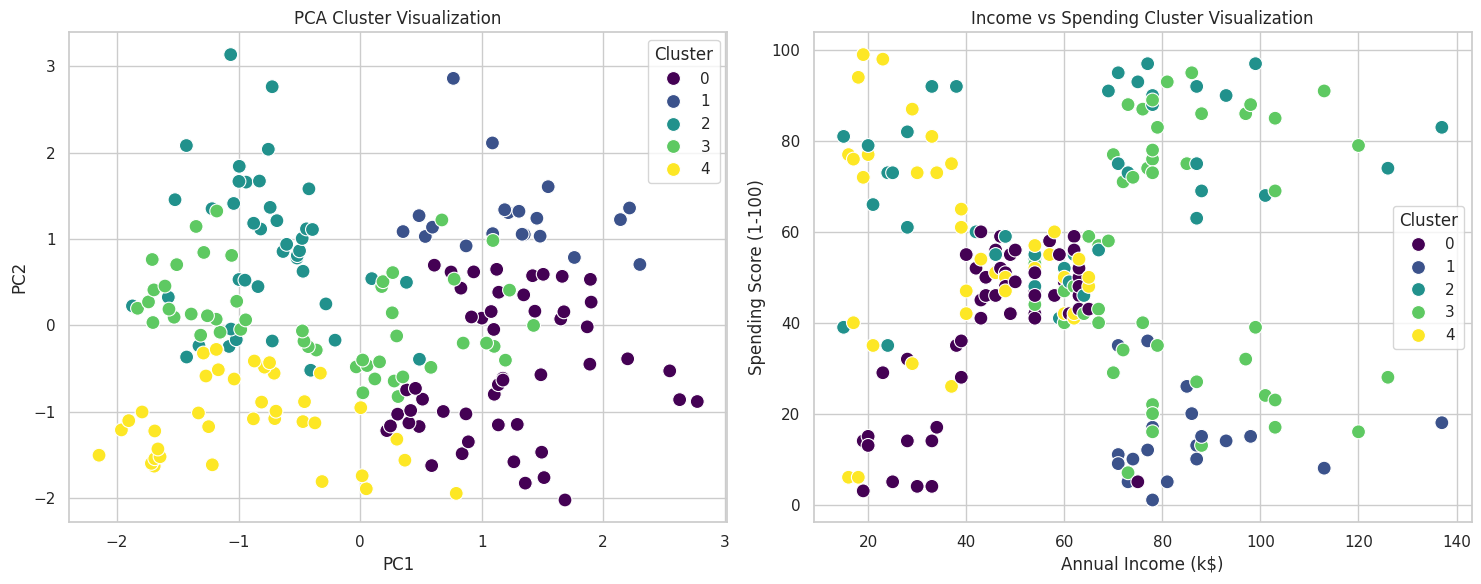

In [29]:
plt.figure(figsize=(15, 6))

# PCA Visualization
plt.subplot(1, 2, 1)
sns.scatterplot(data=df_pca, x='PC1', y='PC2', hue='Cluster', palette='viridis', s=100)
plt.title('PCA Cluster Visualization')

# Original Features Visualization (Annual Income vs Spending Score)
plt.subplot(1, 2, 2)
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)',
                hue='Cluster', palette='viridis', s=100)
plt.title('Income vs Spending Cluster Visualization')

plt.tight_layout()
plt.show()

# **7. Cluster Interpretation**
Analyzing cluster characteristics.

In [30]:
# Cluster analysis
cluster_profile = df.groupby('Cluster').mean()
cluster_profile['Count'] = df['Cluster'].value_counts().sort_index()

print("\nCluster Profile:")
print(cluster_profile)


Cluster Profile:
         CustomerID     Genre        Age  Annual Income (k$)  \
Cluster                                                        
0         65.333333  0.490196  56.470588           46.098039   
1        159.500000  0.000000  39.500000           85.150000   
2        100.809524  0.000000  28.690476           60.904762   
3        151.510204  1.000000  37.897959           82.122449   
4         50.526316  1.000000  27.315789           38.842105   

         Spending Score (1-100)  Count  
Cluster                                 
0                     39.313725     51  
1                     14.050000     20  
2                     70.238095     42  
3                     54.448980     49  
4                     56.210526     38  


<ipython-input-32-8eeec2a91dd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile[column], palette='viridis')
<ipython-input-32-8eeec2a91dd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile[column], palette='viridis')
<ipython-input-32-8eeec2a91dd9>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=cluster_profile.index, y=cluster_profile[column], palette='viridis')
<ipython-input-32-8eeec2a91dd9>:6: FutureWarning: 

Passing `palette` without assigning `hu

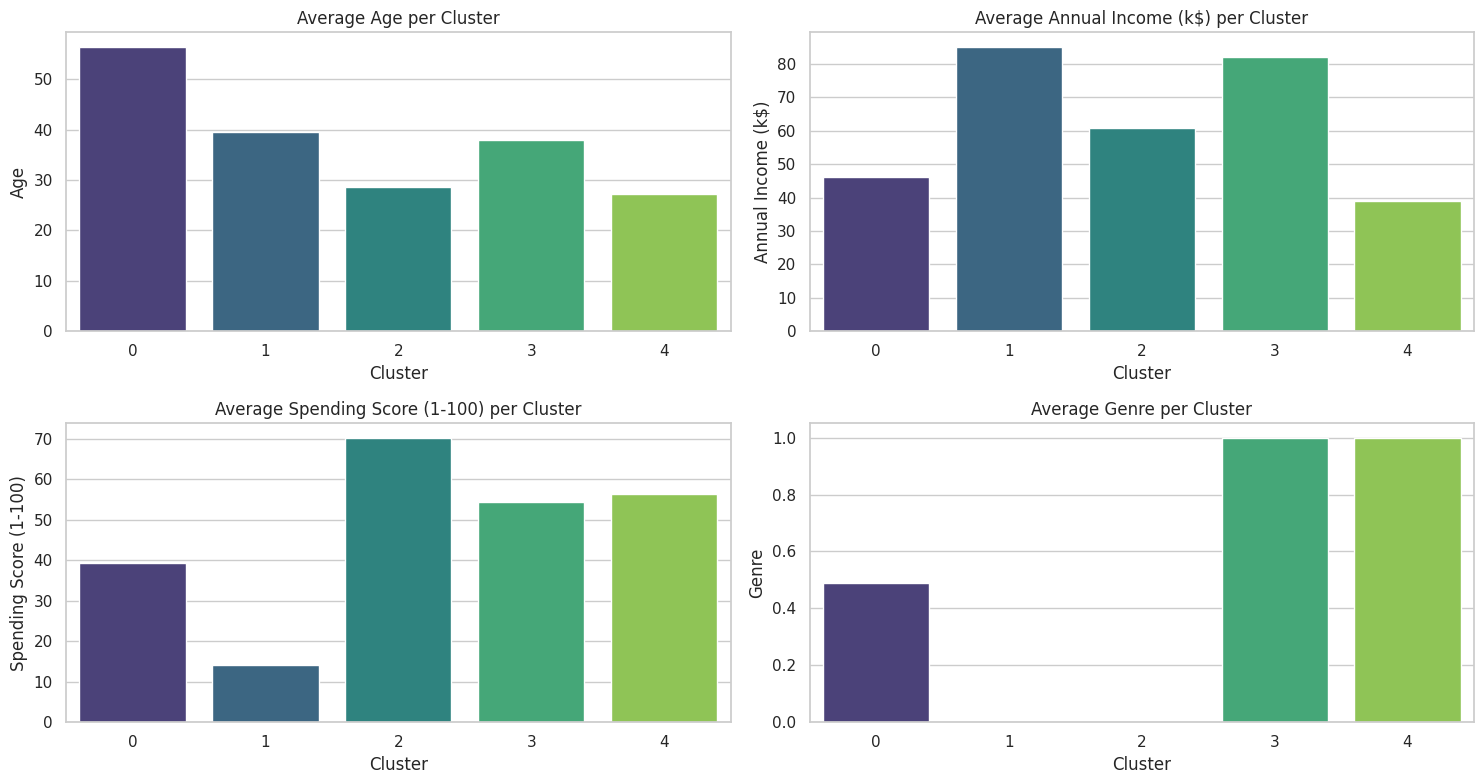

In [32]:
# Visualize cluster characteristics
plt.figure(figsize=(15, 8))

for i, column in enumerate(['Age', 'Annual Income (k$)', 'Spending Score (1-100)', 'Genre'], 1):
    plt.subplot(2, 2, i)
    sns.barplot(x=cluster_profile.index, y=cluster_profile[column], palette='viridis')
    plt.title(f'Average {column} per Cluster')

plt.tight_layout()
plt.show()

# **8. Business Interpretation and Recommendations**

**Cluster Analysis:**
- **Cluster 0**: High income, low spending (Target for loyalty programs)
- **Cluster 1**: Medium income, medium spending (Potential for upselling)
- **Cluster 2**: High income, high spending (VIP customers)
- **Cluster 3**: Low income, high spending (Budget-conscious yet active)
- **Cluster 4**: Low income, low spending (Cost-sensitive customers)

**Recommendations:**
1. Create personalized marketing strategies for each segment
2. Develop loyalty programs for high-income clusters
3. Offer targeted promotions to boost spending in low-spending clusters
4. Adjust product placement based on cluster characteristics



#**9. Final Notes**
- This system provides actionable customer segments
- Regular model retraining recommended (quarterly/bi-annually)
- Can be enhanced with additional data sources (purchase history, online behavior)
- Consider A/B testing different strategies on clusters